In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

from utils.cross_validation import cross_validate
from utils.metrics import aucroc
from utils.estimators import SVCWrapper
from utils.base_set import X_train, y_train, seed

### SVM

In [24]:
mean_val_scores = []
std_val_scores = []
mean_train_scores = []
std_train_scores = []

best_params = {'gamma': 'scale', 'kernel': 'rbf'}
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
cols_val = [f"split_val_{i}" for i in range(k)]
cols_train = [f"split_train_{i}" for i in range(k)]
C_values = np.logspace(-1, 2, 20)
for C in C_values:
    svm = SVCWrapper(C=C, random_state=seed, **best_params)
    auc_scores, _ = cross_validate(svm, X_train, y_train, metric=aucroc, use_decision=True, cv=cv)
    mean_val_scores.append(auc_scores.mean_val.aucroc)
    std_val_scores.append(auc_scores[cols_val].std(axis=1).aucroc)
    mean_train_scores.append(auc_scores.mean_train.aucroc)
    std_train_scores.append(auc_scores[cols_train].std(axis=1).aucroc)

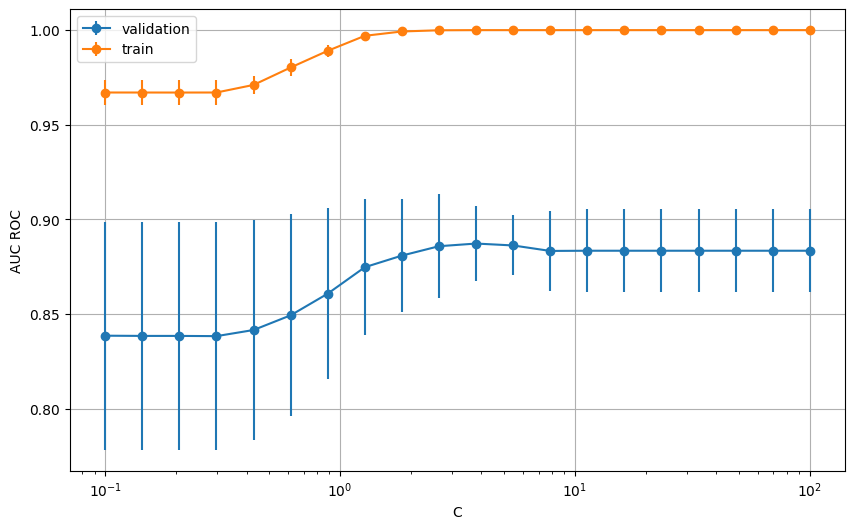

In [25]:
plt.figure(figsize=(10, 6))
plt.errorbar(C_values, mean_val_scores, std_val_scores, fmt='-o', label="validation")
plt.errorbar(C_values, mean_train_scores, std_train_scores, fmt='-o', label="train")
plt.legend()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('AUC ROC')
# plt.title('Curva de Complejidad para SVM') # no hace falta, va en el label del pdf
plt.grid(True)
plt.show()

In [26]:
np.max(mean_val_scores)

0.8872481263334488